
# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul><li><a href="#basicEDA">Basic Questions</a></li>
    <li><a href="#inductive">Inductive Facts</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

**Written by** 

*Haifaa Mohamad Alzahrani*

<a id='intro'></a>
## Introduction

This project aims to explore and analyse The Movie Database (TMDb) dataset which contains information about more than 10,000 movies collected from TMDB, including user ratings and revenue. Therefore, in this report, I'll address some basic or direct and in-direct questions about these movies. 

### <a href="#basicEDA">Report Questions<a>
- What are the top 10 directors based on the number of movies they have produced?
- Which are the top 10 most popular movies?
- Which are the top 10 movies with the most votes?
- What are the 10 movies with the highest revenue?
- What are the top 10 years by the number of movies released?
- Is there any correlation among the data?
- Which genres are most associated with the highest popularity?
- Which genres are most associated with the highest vote average?
- Which genres are most associated with the highest revenue?

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

- ### Load Data

In [3]:
pd.set_option('display.max_columns', None) # to show all columns 
movies = pd.read_csv("tmdb-movies.csv")
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- ### General Properties

In [4]:
movies.shape

(10866, 21)

In [5]:
# Overview on data type and null value
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- ### Data Cleaning

Here, I'm going to remove the unwanted data and duplications, and clean some data.

In [6]:
# As I dont need to 2 different IDs, I'll remove imdb_id
# Also, homepage,overview, tagline, & cast would be reomved
movies.drop(['imdb_id', 'homepage', 'overview', 'tagline', 'cast'], axis = 1, inplace = True)

In [7]:
# Check for duplication
sum(movies.duplicated())

1

In [8]:
# Drop duplication
movies.drop_duplicates(inplace=True)

In [9]:
# To check the duplication of movies consedring the director & release_year
# Some movies hae more than 1 parts, or have been re-made by other directors 
# There is no duplication
movies[movies.duplicated(['original_title', 'director', 'release_year'])].shape

(0, 16)

- ### Data Preparation

Some data needs a few steps to be prepared for the analysis. For example,‘genres’, 'keywords' & 'production_companies' columns contain multiple values separated by pipe ( | ) characters.

In [10]:
# This cell has been copied from
# https://github.com/nanakoohashi/TMDb-movies-genre-popularity/blob/master/Investigate_a_Dataset.py
# it is the easiest way I found it

# There are multiple genre entries for each movie. Split these genre entries.
genres_df = movies.join(movies.genres
               .str.strip('|')
               .str.split('|',expand=True)
               .stack()
               .reset_index(level=1,drop=True)
               .rename('genre')).reset_index(drop=True)

In [11]:
# keep only the needed columns     
genres_df = genres_df[['original_title', 'genre', 'popularity', 'revenue', 'vote_average']]
genres_df

,original_title,genre,popularity,revenue,vote_average
0,Jurassic World,Action,32.985763,1513528810,6.5
1,Jurassic World,Adventure,32.985763,1513528810,6.5
2,Jurassic World,Science Fiction,32.985763,1513528810,6.5
3,Jurassic World,Thriller,32.985763,1513528810,6.5
4,Mad Max: Fury Road,Action,28.419936,378436354,7.1
...,...,...,...,...,...
26973,Beregis Avtomobilya,Mystery,0.065141,0,6.5
26974,Beregis Avtomobilya,Comedy,0.065141,0,6.5
26975,"What's Up, Tiger Lily?",Action,0.064317,0,5.4
26976,"What's Up, Tiger Lily?",Comedy,0.064317,0,5.4


- ### Basic Stats

In [12]:
# General view on some statistics values
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above table, we can find:
- Most of movies populartiy are below 0.71
- The average of budget is 1.462429e+07
- Most of movies runtime is 111 minutes
- Most of movies have around 6.6/10 as vote average
- The dataset covers movies from 1960 to 2015

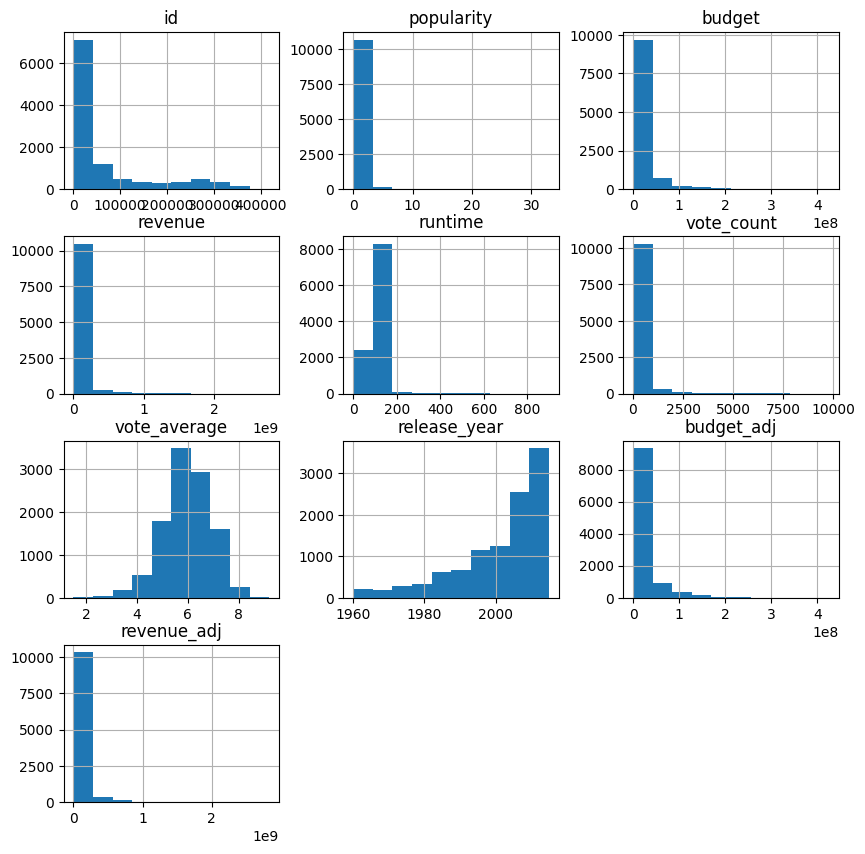

In [13]:
# Distribution of data
movies.hist(figsize=(10,10));

From the distribution graphs, we see:
- Most the movies have more than 100 minutes for runtime
- Around 2000 movies have 100 minutes or less
- Release year is skewed to left, and most of movies have been released after 2000
- Vote average chart reflects that most movies have voted with 6
- Fewer movies have 8 or higher for vote average

<a id='eda'></a>
## Exploratory Data Analysis
<a id='basicEDA'></a>

In [14]:
# This function is used to setup all charts' details such as title and labels
def drawChart(title, xlabelText, ylabelText, xticksRotate ):
    plt.title(title)
    plt.grid(zorder=0)
    plt.xticks(rotation=xticksRotate)
    plt.xlabel(xlabelText)
    plt.ylabel(ylabelText)
    plt.show()

- ### What are the top 10 directors based on the number of movies they have produced?

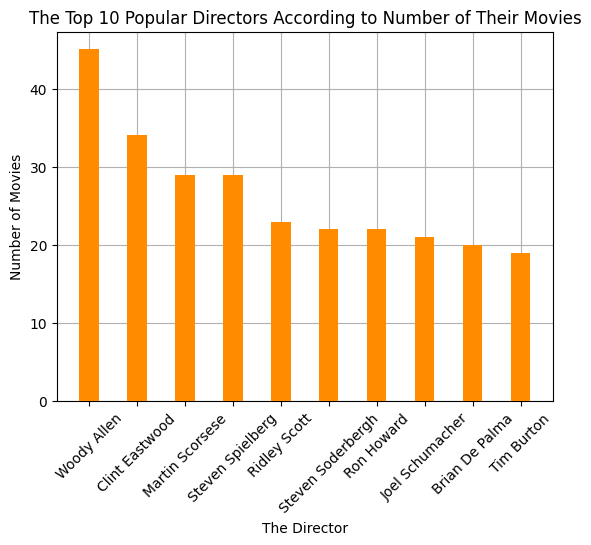

In [15]:
# Number of movies per director
directors = movies['director'].value_counts().nlargest(10) # Top 10
directors
plt.bar(pd.Series(directors.index), directors.values, width = 0.4, color="darkorange", zorder=3)
drawChart("The Top 10 Popular Directors According to Number of Their Movies", "The Director", "Number of Movies", 45)

 The number of Woody Allen's movies significantly outperforms the rest, as he produced 45 movies, which is 11 movies more than the second place (Clint Eastwood) and twice the number of movies of the sixth place (in the case of Steven Soderbergh with 22 movies only). The last place went for Tim Burton with 19 movies

- ### Which are the top 10 most popular movies?

C:\Users\11023898\AppData\Local\Temp\ipykernel_8344\3460596839.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popular_movies = movies.groupby('original_title').sum().popularity.nlargest(10)


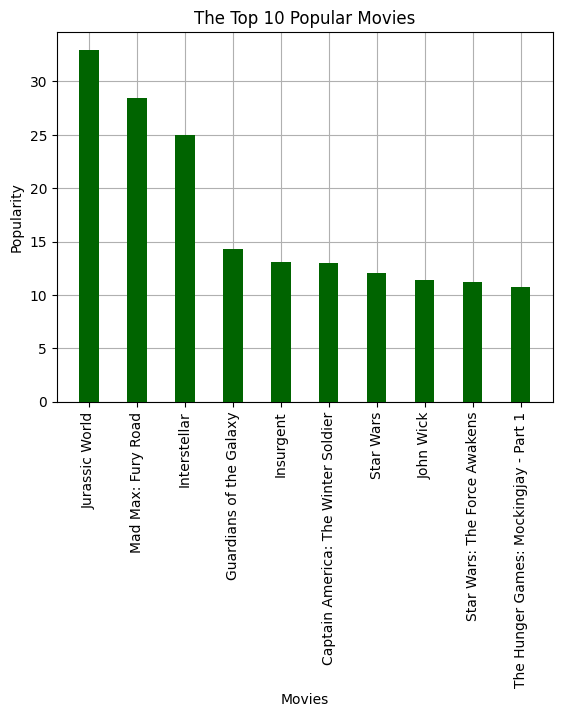

In [16]:
popular_movies = movies.groupby('original_title').sum().popularity.nlargest(10)
plt.bar(pd.Series(popular_movies.index), popular_movies.values, width = 0.4, color="darkgreen", zorder=3)
drawChart("The Top 10 Popular Movies", "Movies", "Popularity", 90)

The popularity of the first 3 movies: Jurassic World, Mad Max: Fury Road, and Interstellar significantly outperform the others. Jurassic World's popularity was about 33, while the last one which is The Hunger Games: Mockingjay was 11.

- ### Which are the top 10 movies with the most votes?

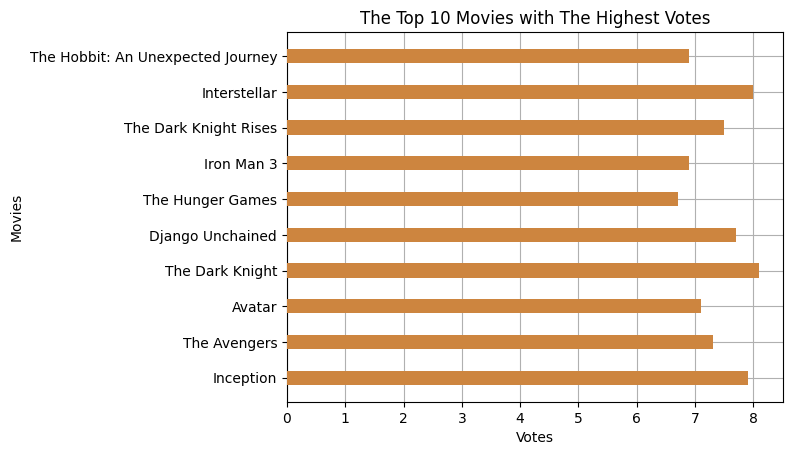

In [17]:
# Top 10 movies based on vote_count
highestVoted_movies = movies.nlargest(10, 'vote_count')
plt.barh(highestVoted_movies['original_title'], highestVoted_movies['vote_average'], 
         height = 0.4, color="peru", zorder=3)
drawChart( "The Top 10 Movies with The Highest Votes", "Votes", "Movies", 0)

The Dark Knight, Intersteller and Inception have the votes (8.1, 8, 7.9). Also, The Hunger Games, The Hobbit: An Unexpected Journey, and Iron Man 3 have the lowest votes (6.7 and 6.9).

- ### What are the 10 movies with the highest revenue?

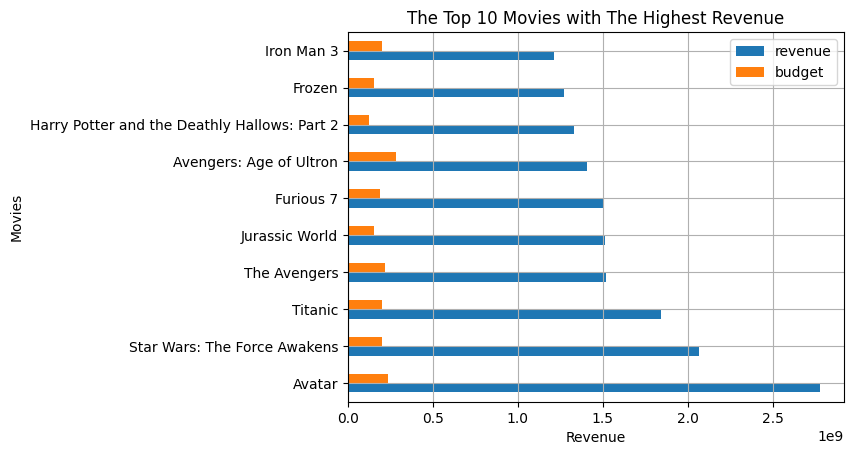

In [18]:
# Top 10 movies based on highest revenue
highestRevenue_movies = movies.nlargest(10, 'revenue')
highestRevenue_movies.plot(x="original_title", y=["revenue", "budget"], kind="barh")
drawChart( "The Top 10 Movies with The Highest Revenue", "Revenue", "Movies", 0)

Obviously, Avatar has the highest revenue (more than 2.7B), while Iron Man 3 has the lowest revenue with 1.2B.

- ### What are the top 10 years by the number of movies released?

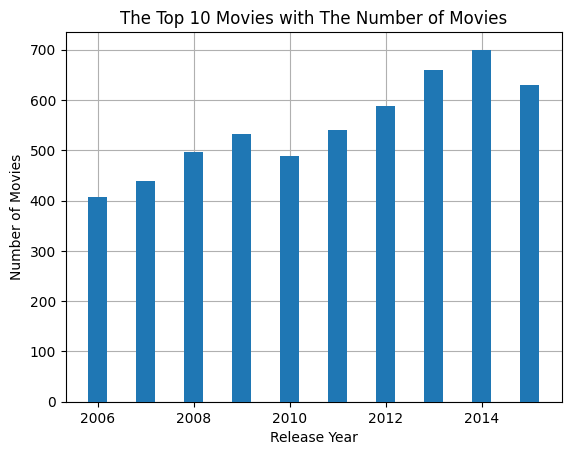

In [19]:
# Top 10 years based on number of movies
years = movies['release_year'].value_counts().nlargest(10) # Top 10
plt.bar(pd.Series(years.index),years.values, width = 0.4, zorder=3)
drawChart( "The Top 10 Movies with The Number of Movies", "Release Year", "Number of Movies", 0)

As shown above, the number of released movies in 2014 was 700 which is the highest number of released movies in any year. On the other hand, 2006 was the lowest year with only 408 movies.

- ### Is there any correlation among the data?

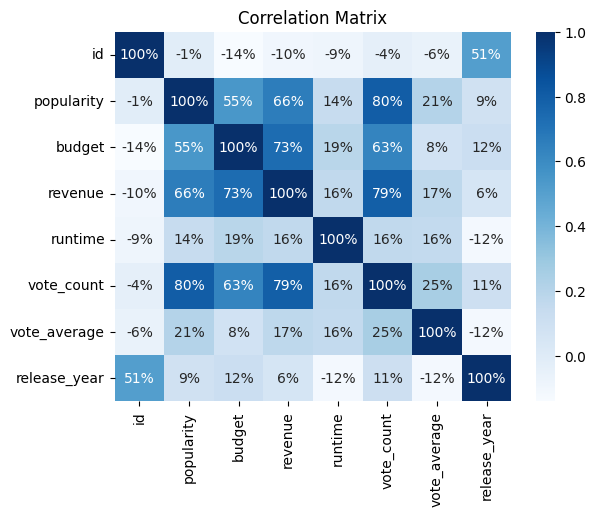

In [21]:
correlated = movies[['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year']]
plt.title("Correlation Matrix")
sns.heatmap(correlated.corr(),annot=True, fmt='.0%',cmap="Blues")
plt.show()

From the correlation matrix, we see a strong correlation between:
     <ul>
     <li> Popularity and vote Count. <li>
     Revenue and vote count.
     </ul>
The most intersting thing is that there is no strong correlation between the vote average and any other numerical property. 

- ### Which genres are most associated with the highest popularity?

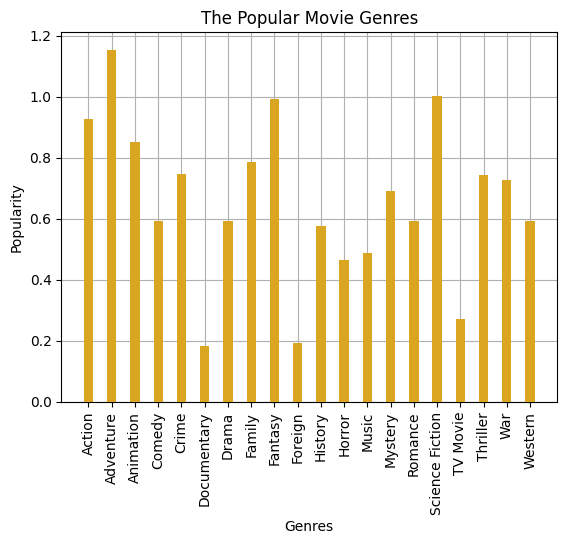

In [22]:
popular_genres = genres_df.groupby('genre').popularity.mean()
plt.bar(pd.Series(popular_genres.index),popular_genres.values, 
        width = 0.4, color = "goldenrod", zorder=3)
drawChart( "The Popular Movie Genres", "Genres", "Popularity", 90)

Adventure, Fantasy, and Science Fiction are the most popular genres, while Documentary and Foreign are the less popular. 

- ### Which genres are most associated with the highest vote average?

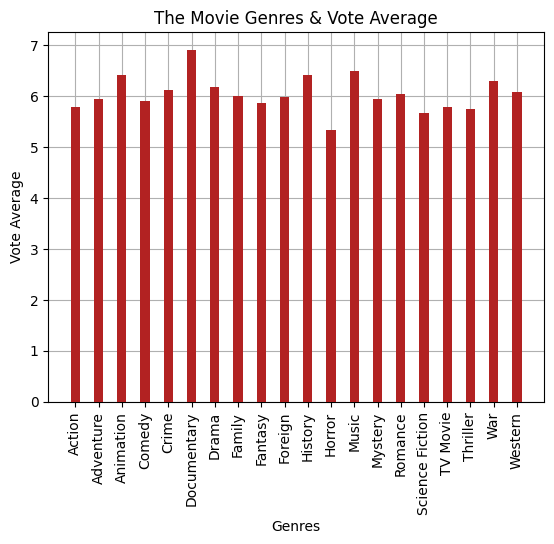

In [23]:
highestRevenue_genres = genres_df.groupby('genre').vote_average.mean()
plt.bar(pd.Series(highestRevenue_genres.index), highestRevenue_genres.values, 
        width = 0.4, color="firebrick", zorder=3)
drawChart( "The Movie Genres & Vote Average", "Genres", "Vote Average", 90)

As we see, Documentary has the highest vote average and Horror movies have the lowest vote average. 

- ### Which genres are most associated with the highest revenue?

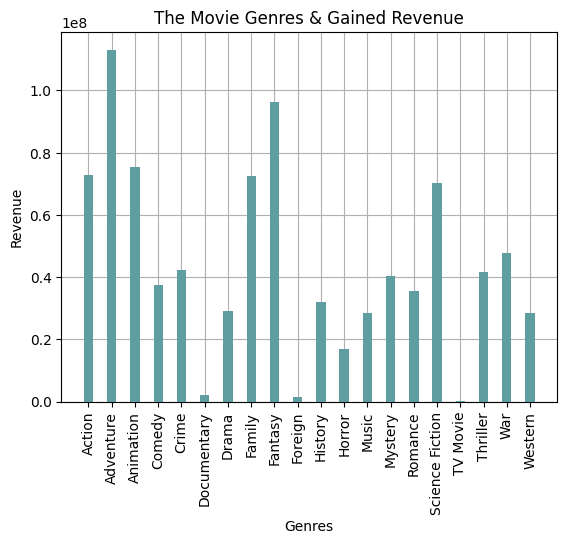

In [24]:
highestRevenue_genres = genres_df.groupby('genre').revenue.mean()
plt.bar(pd.Series(highestRevenue_genres.index),highestRevenue_genres.values, 
        width = 0.4, color="cadetblue", zorder=3)
drawChart( "The Movie Genres & Gained Revenue", "Genres", "Revenue", 90)

Here, we found that Adventure and Fantasy generated the highest revenue. On the other side, Foreign and Documentary have the lowest revenue.

<a id='conclusions'></a>
## Conclusions

Exploring this dataset resulted in the following outcomes:
- There is a strong correlation between popularity and vote count, also revenue and vote count.
- There was no strong correlation between the vote average and any other numerical property.
- The **drama** is the most popular genre.
- The second popular genre is **comedy** which is a little bit higher than **action**. 
- The least popular ones is the **documentaries** and **foreign** movies.
- **Documentary** and **musical** movies have the highest vote average.
- **Horror** and **science-fiction** movies have the lowest vote average.
- **Adventure** and **fantasy** movies have the highest revenue.
- **foreign** and **documentary** movies have the lowest revenue.

Finally, The limitation with these findings is that:
- The movies usually have multiple genres which have not been considered in the report. 
- Number of foreign movies and documentaries is a relatively low 